In [29]:
pip install scipy

In [30]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import scipy.io

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
tranining_data_5_path = '/content/drive/MyDrive/Colab Notebooks/Assignment1/training_data_5.mat'
tranining_data_6_path = '/content/drive/MyDrive/Colab Notebooks/Assignment1/training_data_6.mat'
testing_data_5_path = '/content/drive/MyDrive/Colab Notebooks/Assignment1/testing_data_5.mat'
testing_data_6_path = '/content/drive/MyDrive/Colab Notebooks/Assignment1/testing_data_6.mat'
#load data
training_data_5 = scipy.io.loadmat(tranining_data_5_path)['train_data_5']
data = scipy.io.loadmat(tranining_data_5_path)
print(data.keys())
training_data_6 = scipy.io.loadmat(tranining_data_6_path)['train_data_6']
data = scipy.io.loadmat(tranining_data_6_path)
print(data.keys())
testing_data_5 = scipy.io.loadmat(testing_data_5_path)['test_data_5']
data = scipy.io.loadmat(testing_data_5_path)
print(data.keys())
testing_data_6 = scipy.io.loadmat(testing_data_6_path)['test_data_6']

data = scipy.io.loadmat(testing_data_6_path)
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'train_data_5'])
dict_keys(['__header__', '__version__', '__globals__', 'train_data_6'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data_5'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data_6'])


###Task 1###
Feature normalization \
- Training set is 'X', then calculate mean and standard deviation for each training data
- A small number e has been added becasue of 'invalid value encountered in divide'



In [120]:

training_data_5 = training_data_5.reshape(training_data_5.shape[0], -1)
training_data_6 = training_data_6.reshape(training_data_6.shape[0], -1)
train_data = np.concatenate((training_data_5,training_data_6),axis=0)

testing_data_5 = testing_data_5.reshape(testing_data_5.shape[0], -1)
testing_data_6 = testing_data_6.reshape(testing_data_6.shape[0], -1)
test_data = np.concatenate((testing_data_5,testing_data_6),axis=0)

In [127]:
def normalization(X):
  m = np.mean(X,axis = 0)
  s = np.std(X,axis = 0)+ 10**(-6)
  normalized = (X-m)/s
  return normalized


ntrain = normalization(train_data)
ntest = normalization(test_data)

print("ntrain",ntrain)
print('mean',np.mean(ntrain))
print('std',np.std(ntrain))

ntrain [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
mean 8.6851987e-10
std 0.9028031


###Task 2: PCA using the training samples###
- Calculate covariance matrix
- Calculate eigenvalue and eigenvector
- Principle component accounts for largest possible variance



In [122]:
from numpy.linalg import eig
def PCA(data):
  mean = np.mean(data,axis = 0)
  data = data-mean
  cov_matrix = np.cov(data,rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
  index = np.argsort(eigenvalues)[::-1]
  pc = eigenvectors[:,index[:2]]
  return pc


#principle_component = PCA(normalized_train)
#print("principle component: ", principle_component)

principle_component = PCA(ntrain)

print("priciple component: ",principle_component)



priciple component:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


###Task3 Dimension reduction using PCA###
- Repeat task 1 and 2 for testing data
- Calculate dot product
- plot

It looks like normal distribution

In [113]:
import matplotlib.pyplot as plt

principle component shape:  (784, 2)


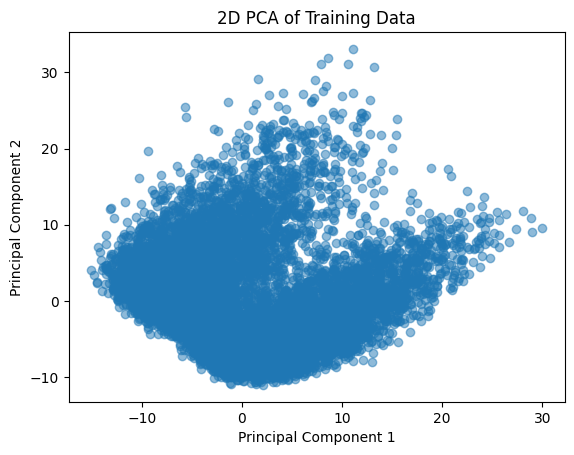

<function matplotlib.pyplot.show(close=None, block=None)>

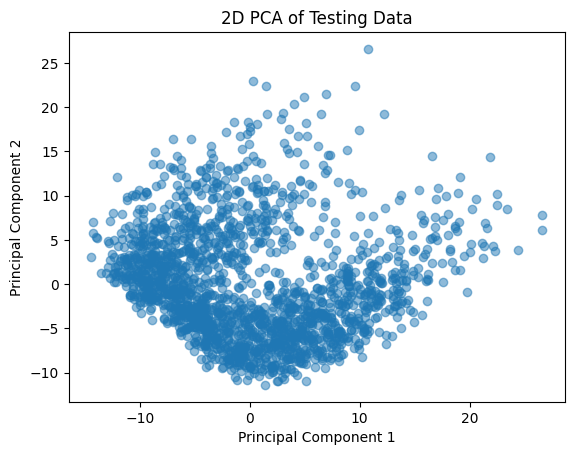

In [123]:


# projection
projected_train = np.dot(ntrain,principle_component)
projected_test = np.dot(ntest,principle_component)
print("principle component shape: ", principle_component.shape)
# plot
plt.scatter(projected_train[:, 0], projected_train[:, 1],alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Training Data')
plt.show()

plt.scatter(projected_test[:, 0], projected_test[:, 1],alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Testing Data')
plt.show()



###Task 4: Density Estimation###

In [128]:
from scipy.stats import multivariate_normal

mean_5 = np.mean(projected_train[:5421], axis=0)
cov_5 = np.cov(projected_train[:5421], rowvar=False)
distribution_5 = multivariate_normal(mean_5, cov_5,allow_singular=True)

mean_6 = np.mean(projected_train[5421:], axis=0)
cov_6 = np.cov(projected_train[5421:], rowvar=False)
distribution_6 = multivariate_normal(mean_6, cov_6,allow_singular=True)

print('mean 5:',mean_5)
print('cov5',cov_5)
print('distribution5:',distribution_5)
print('mean 6:',mean_6)
print('cov6',cov_6)
print('distribution6:',distribution_6)

mean 5: [-4.45320754  4.06951368]
cov5 [[23.39792678 15.13683882]
 [15.13683882 36.44222307]]
distribution5: <scipy.stats._multivariate.multivariate_normal_frozen object at 0x784c8931f3d0>
mean 6: [ 4.07922239 -3.72775163]
cov6 [[42.26796511 17.94673869]
 [17.94673869 18.33394406]]
distribution6: <scipy.stats._multivariate.multivariate_normal_frozen object at 0x784c8931fe20>


###Task 5: Bayesian Decision Theory for optimal classification###




In [116]:
def classify(x, distribution_5, distribution_6):
    p_5 = distribution_5.pdf(x)
    p_6 = distribution_6.pdf(x)
    return 5 if p_5 > p_6 else 6

predicted_train = np.array([classify(x, distribution_5, distribution_6) for x in projected_train])
predicted_test = np.array([classify(x, distribution_5, distribution_6) for x in projected_test])

train_accuracy = np.mean(predicted_train == np.concatenate([np.full(5421, 5), np.full(5918, 6)]))
test_accuracy = np.mean(predicted_test == np.concatenate([np.full(892, 5), np.full(958, 6)]))

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)


Training accuracy: 0.9427639121615663
Testing accuracy: 0.9394594594594594
